In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

c:\Users\user\anaconda3\envs\summarizerP39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# resolution of the image (square)
image_res = 256
# move the image left / right / up / down
image_center_x = 0.5
image_center_y = 0.5
# zoom the image in and out
zoom_factor = 5

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 50)
        self.fc5 = nn.Linear(50, 50)
        self.fc6 = nn.Linear(50, 3)
        
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc2.weight, a=-1, b=1)
        nn.init.uniform_(self.fc3.weight, a=-1, b=1)
        nn.init.uniform_(self.fc4.weight, a=-1, b=1)
        nn.init.uniform_(self.fc5.weight, a=-1, b=1)
        nn.init.uniform_(self.fc6.weight, a=-1, b=1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = torch.tanh(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
        
        return x

net = Net()

In [4]:
def display_image(img_array):
    img_array = np.array(img_array)
    plt.imshow(img_array)
    plt.show()

In [5]:
def get_img_array():
    dummy = np.zeros((image_res, image_res, 3))
    
    for x in tqdm(range(len(dummy))):
        centered_x = (x / image_res - image_center_x) * zoom_factor
        
        for y in range(len(dummy[x])):
            centered_y = (y / image_res - image_center_y) * zoom_factor
            
            dummy[x][y] = net(torch.tensor([centered_x, centered_y], dtype=torch.float32)).detach().numpy()
    
    return dummy

100%|██████████| 256/256 [00:09<00:00, 26.75it/s]


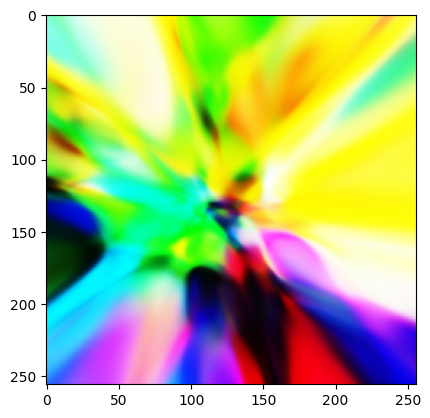

In [23]:
display_image(get_img_array())